## Der Mittelwert und die Standardabweichung einer diskreten Zufallsvariablen
----------------------------------------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Mittelwert einer diskreten Zufallsvariable

Der Mittelwert einer **diskreten Zufallsvariablen** $X$ wird mit $\mu_X$ oder, wenn keine Verwechslung auftreten soll, einfach mit $\mu$ bezeichnet. Die Begriffe **Erwartungswert**, $E(X)$ und **Erwartung** werden üblicherweise anstelle des Begriffs Mittelwert verwendet.

$$E(X) = \sum_{i=1}^{N}x_iP(X=x_i)$$

Bei einer großen Anzahl unabhängiger Beobachtungen einer Zufallsvariablen $X$ nähert sich $E(X)$ dieser Beobachtungen - der Stichprobe - dem Mittelwert $\mu$ der Grundgesamtheit an. Je größer die Zahl der Beobachtungen ist, desto näher liegt $E(X)$ an $\mu$ (Weiss 2010).

Erinnern wir uns an unser Experiment aus dem vorherigen Abschnitt, als wir $1.000$ Personen ausgewählt und nach der Anzahl der Geschwister gefragt haben. Werfen wir noch einmal einen Blick auf die Tabelle, die das Experiment zusammenfasst

\begin{array}{c|lcr}
\text{Geschwister} & \text{Häufigkeit} & \text{Relative}\\
\ x & f & \text{Häufigkeit}\\
\hline
0 & 205 & 0.205  \\
1 & 419 & 0.419  \\
2 & 280 & 0.28 \\
3 & 65 & 0.065  \\
4 & 29 & 0.029  \\
5 & 2 & 0.002 \\
\hline
 & 1000 & 1
\end{array}

Berechnen wir den Erwartungswert (Mittelwert) für dieses Experiment.

\begin{align}
\\ 
& E(X) = \sum_{i=1}^{N}x_iP(X=x_i) \\
& = 0 \cdot P(X=0) + 1 \cdot P(X=1)+ 2 \cdot P(X=2) + 3 \cdot P(X=3) +4 \cdot P(X=4)+ 5 \cdot P(X \ge 5) \\
& = 0 \cdot 0,205 + 1 \cdot 0,419 + 2 \cdot 0,28+ 3 \cdot 0,065  + 4 \cdot 0,029  + 5 \cdot 0,002  \\
& = 1,3
\end{align}

Der sich daraus ergebende Erwartungswert von $1,3$ liegt nahe am Mittelwert $\mu$, den wir anhand der Wahrscheinlichkeiten der Grundgesamtheit berechnen (die realen Wahrscheinlichkeiten sind der unteren rechten Abbildung im vorherigen Abschnitt entnommen).

$$\mu = 1 \cdot 0,2 + 2 \cdot 0,425 +  3 \cdot 0,275 + 4 \cdot 0,07 + 5 \cdot 0,025 = 1,31$$

In Python schreiben wir den folgenden Code:

In [18]:
p_die = 1/6
die = pd.Series([1,2,3,4,5,6])
die = die * p_die
sum(die)

3.5

Was aber, wenn wir uns nicht sicher sind, ob die Würfel wirklich fair sind? Woher wissen wir, dass wir nicht betrogen werden? Oder anders ausgedrückt: Wie oft müssen wir würfeln, bevor wir mehr Vertrauen haben können?

Führen wir ein Berechnungsexperiment durch: Wir wissen aus den obigen Überlegungen, dass der Erwartungswert eines $6$-seitigen fairen Würfels $3,5$ ist. Wir führen ein Experiment durch, indem wir einen Würfel immer und immer wieder werfen. Wir speichern das Ergebnis und bevor wir erneut würfeln, berechnen wir den Durchschnitt aller bisherigen Würfelwürfe. Um dieses kleine Experiment durchzuführen, schreiben wir eine for-Schleife in Python.

(0.0, 6.5)

<Figure size 432x288 with 0 Axes>

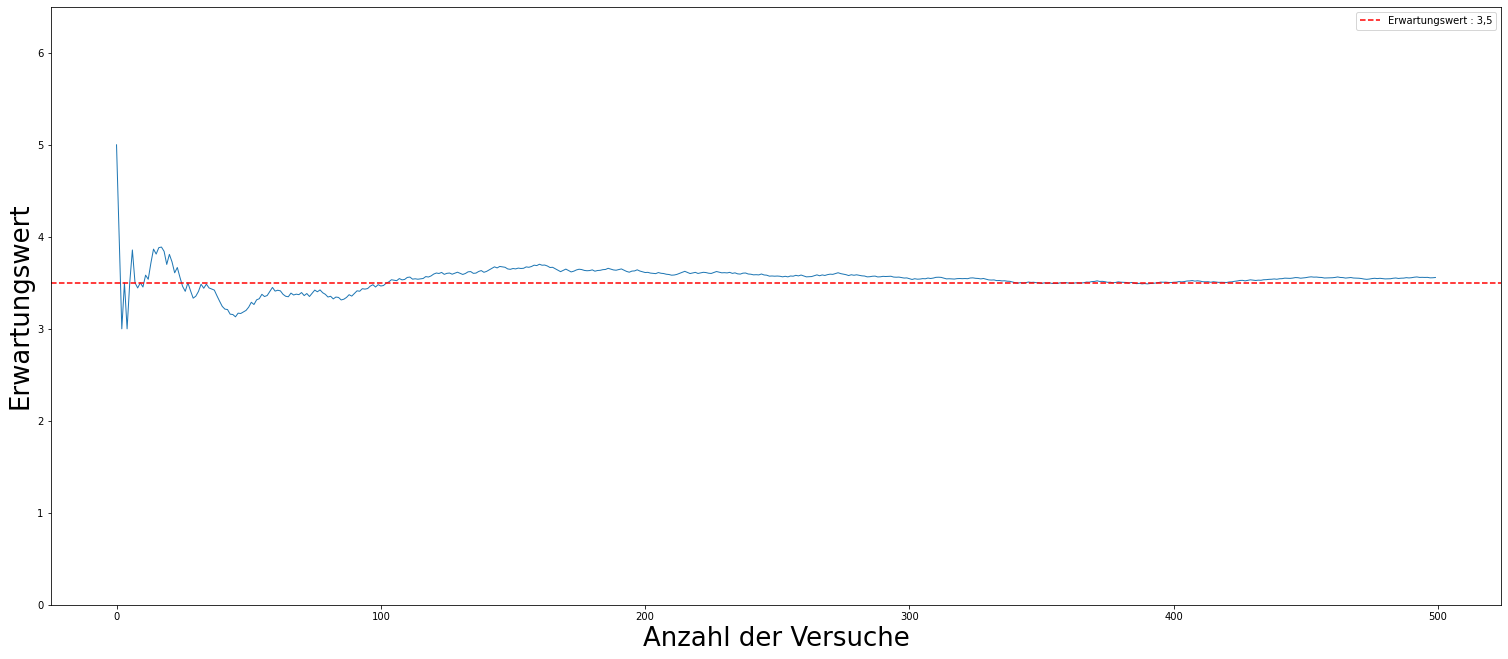

In [145]:
# Simuliere Würfelwurf
# Initialisiere Variablen wuerfel , x und Ewert
wuerfel = []
Ewert = []
x = list(range(0,500))

# Erzeuge 500 Zufallszahlen zwischen 1 , ..., 6 
# und füge sie zu wuerfel hinzu; Schreibe momentane Mittelwerte in Ewert
for i in range(500):
    r=random.randint(1,6)
    wuerfel.append(r)
    Ewert.append(np.mean(wuerfel))

# Plotte die Werte
fig = plt.figure()
fig = plt.figure(figsize=(26,11))
ax = plt.gca()
plt.plot(x,Ewert,lw=1)
line1 = plt.axhline(y=3.5, color='r', ls = '--',label='Erwartungswert : 3,5')
ax.legend(handles=[line1])
plt.xlabel('Anzahl der Versuche', fontsize = '26')
plt.ylabel('Erwartungswert', fontsize = '26')
plt.ylim(0,6.5)

Das Diagramm zeigt, dass die Kurve nach anfänglichen Schwankungen schließlich abflacht und sich dem $E(X)$ von $3,5$ annähert.

### Standardabweichung einer diskreten Zufallsvariable

Die Standardabweichung einer diskreten Zufallsvariablen $X$ wird mit $\sigma_X$ oder, wenn keine Verwechslung auftreten soll, einfach mit $\sigma$ bezeichnet. Sie ist definiert als

$$\sigma = \sqrt{\sum_{i=1}^{N}(x_i-\mu)^2P(X=x_i)}$$

#### Übung

Wenden wir uns nun Python zu und berechnen die Standardabweichung für das Würfelexperiment von oben. Während des Experiments haben wir 500 Mal gewürfelt. Die Ergebnisse dieser Würfe sind in der Liste `wuerfel` gespeichert. Die relative Häufigkeit für jede dieser Zahlen in `wuerfel`  beträgt annähernd $\frac{1}{6}=0,167$. Also setzen wir diese Zahlen einfach in die Gleichung für die Standardabweichung von oben ein. Denken Sie daran, dass der Erwartungswert nach $500$ Würfen in der Variablen `Ewert[499]` gespeichert ist.

In [146]:
# Initialisiere Variablen wuerfel_mean und relH
wuerfel_mean = Ewert[499]
relH = []

# Berechne relativen Häufigkeiten
for i in range(1,7):
    relH.append(wuerfel.count(i)/len(wuerfel))

relH=pd.DataFrame(relH)
iwerte=pd.DataFrame([1,2,3,4,5,6])
for i in range(6):
    wuerfel_std =np.sqrt(sum(((iwerte.values - wuerfel_mean)**2*relH.values)))
    
print('Standardabweichung nach 500 Würfen:',wuerfel_std)

Standardabweichung nach 500 Würfen: [1.73281159]


Grob gesagt hat unser Experiment gezeigt, dass nach $500$ Würfen der Wert einer Würfelzahl im Durchschnitt um $1.73$ vom experimentellen Mittelwert von $3,558$ abweicht.